In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('C:/Users/Morien/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/Morien/Downloads/test.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_num_stats=train_df.describe(percentiles= [.1,.20,.25,.40, .5,.6, .75,.8,.9]) # keep based on which you partition

In [15]:
print(train_num_stats.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']


In [21]:
train_num_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [19]:
train_cat_stats=train_df.describe(include = ['O'])

In [20]:
train_cat_stats

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Leslie",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [22]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# seems like high corelation with survival

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived', ascending=False)
#low count and high %tage survivla point to teh fact that their was preferace given to pclass 1 customer
#as count incease %ate of surviving goes downin term of classes

,Pclass,Survived
2,3,491
0,1,216
1,2,184


In [25]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).count().sort_values(by='Survived', ascending=False)
# female have lest coutn and very high %tage
#beieng a female definately helpe din survival

,Sex,Survived
1,male,577
0,female,314


In [47]:
((train_df[train_df.SibSp==0].shape[0])*100)/train_df.shape[0] #68% have no sibling

68.23793490460157

In [48]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#people with one or two sibling or spouse had a better chance of survival
#combine 1 and 2

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [49]:
((train_df[train_df.Parch==0].shape[0])*100)/train_df.shape[0] #76% have parent of child

76.0942760942761

In [50]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Parch,Survived
0,0,678
1,1,118
2,2,80
3,3,5
5,5,5
4,4,4
6,6,1


In [51]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [53]:
train_df[["SibSp","Parch", "Survived"]].groupby(['Parch','SibSp'], as_index=False).count().sort_values(by='Survived', ascending=False)
#only top have have some cosiderable number will not combine these columns liek in the example

,Parch,SibSp,Survived
0,0,0,537
1,0,1,123
5,1,1,57
4,1,0,38
9,2,0,29
10,2,1,19
2,0,2,16
13,2,4,9
8,1,4,9
15,2,8,7


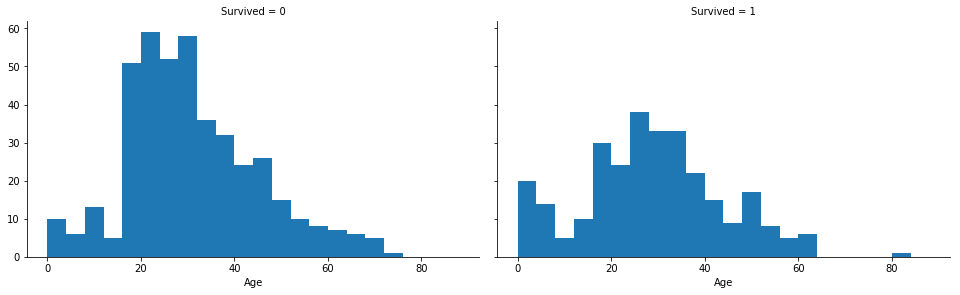

In [66]:
g = sns.FacetGrid(train_df, col='Survived', size=4.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=range(0, 92, 4))

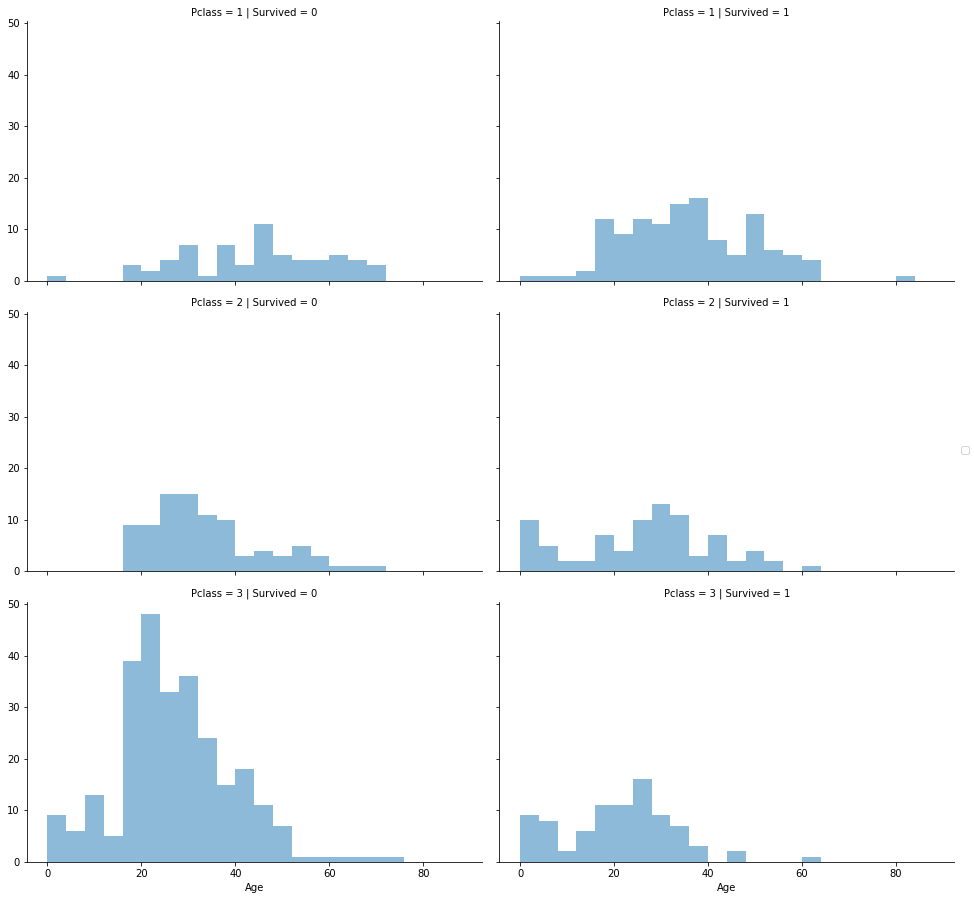

In [64]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0, 92, 4))
grid.add_legend();

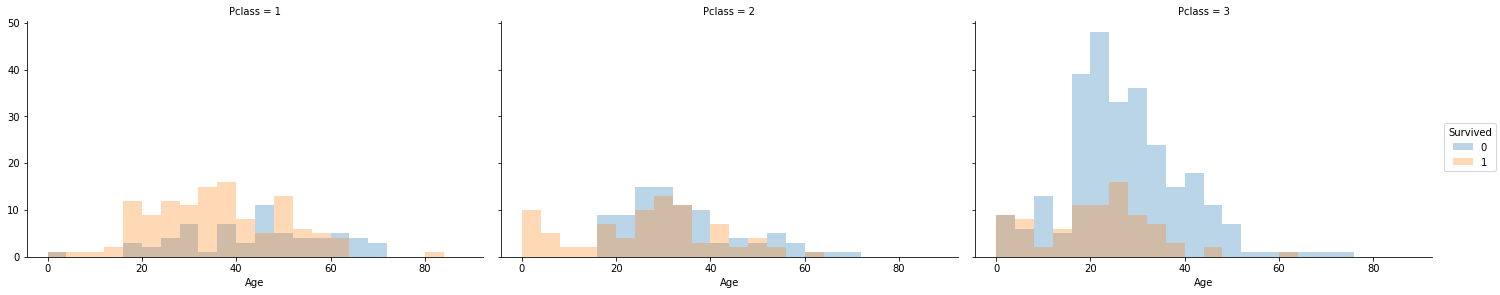

In [68]:
grid = sns.FacetGrid(train_df, hue='Survived', col='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.3, bins=range(0, 92, 4))
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


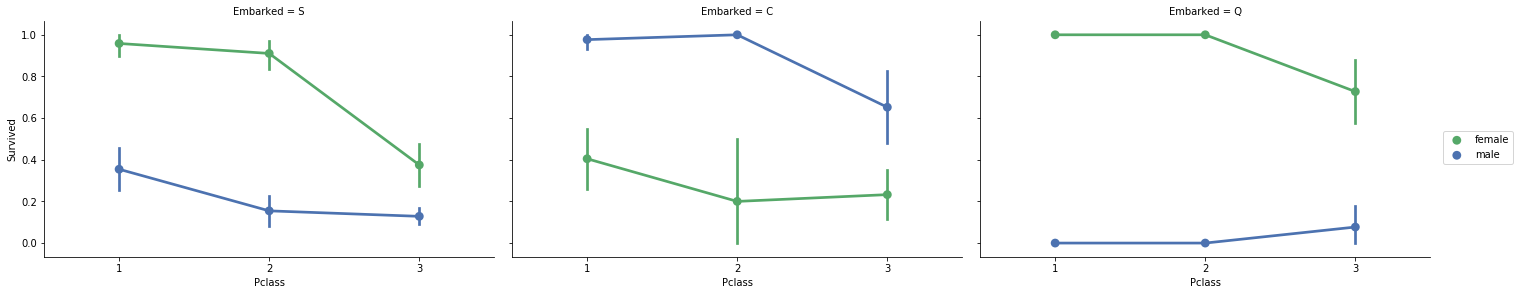

In [72]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, col='Embarked', size=4.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

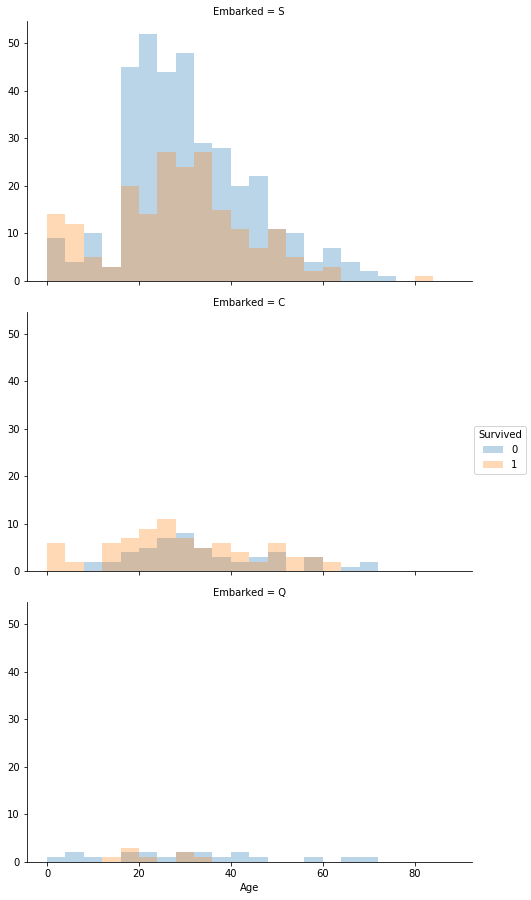

In [74]:
grid = sns.FacetGrid(train_df, hue='Survived', row='Embarked', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.3, bins=range(0, 92, 4))
grid.add_legend();

In [75]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


Before (891, 12) (418, 11) (891, 12) (418, 11)


In [91]:

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]


In [92]:
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [93]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [94]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'MRare')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Dona'], 'FRare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,FRare,1.000000
1,MRare,0.285714
2,Master,0.575000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651


In [99]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "FRare": 5, "MRare": 6}

In [100]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [101]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [102]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


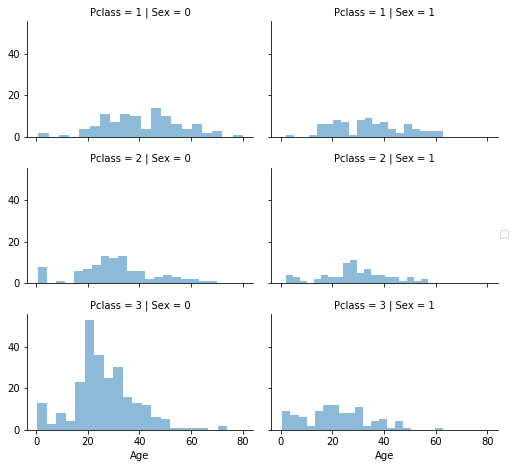

In [103]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [104]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [105]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 

In [106]:
 print(guess_ages)

[[42. 28. 24.]
 [41. 24. 22.]]


In [107]:
for dataset in combine:
    for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
        
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [111]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 20)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 4.0]",0.675000
1,"(4.0, 8.0]",0.642857
2,"(8.0, 12.0]",0.266667
3,"(12.0, 16.0]",0.483871
4,"(16.0, 20.0]",0.337500
5,"(20.0, 24.0]",0.305085
6,"(24.0, 28.0]",0.336842
7,"(28.0, 32.0]",0.428571
8,"(32.0, 36.0]",0.472222
9,"(36.0, 40.0]",0.369565


In [114]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 4, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 8), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 40), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 44), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 48), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 52), 'Age'] = 13
    dataset.loc[(dataset['Age'] > 52) & (dataset['Age'] <= 56), 'Age'] = 14
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 60), 'Age'] = 15
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 64), 'Age'] = 16
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 68), 'Age'] = 17
    dataset.loc[(dataset['Age'] > 68) & (dataset['Age'] <= 72), 'Age'] = 18
    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 76), 'Age'] = 19
    dataset.loc[(dataset['Age'] > 76) & (dataset['Age'] <= 80), 'Age'] = 20
    dataset.loc[ dataset['Age'] > 80, 'Age']=21
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,6,1,0,7.2500,S,1,"(20.0, 24.0]"
1,1,1,1,10,1,0,71.2833,C,3,"(36.0, 40.0]"
2,1,3,1,7,0,0,7.9250,S,2,"(24.0, 28.0]"
3,1,1,1,9,1,0,53.1000,S,3,"(32.0, 36.0]"
4,0,3,0,9,0,0,8.0500,S,1,"(32.0, 36.0]"


In [115]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,6,1,0,7.2500,S,1
1,1,1,1,10,1,0,71.2833,C,3
2,1,3,1,7,0,0,7.9250,S,2
3,1,1,1,9,1,0,53.1000,S,3
4,0,3,0,9,0,0,8.0500,S,1


In [116]:
for dataset in combine:
    dataset.loc[ dataset['SibSp'] ==0,'SibSp']=1
    dataset.loc[ dataset['SibSp'] ==1,'SibSp']=2
    dataset.loc[ dataset['SibSp'] ==2,'SibSp']=2
    dataset.loc[ dataset['SibSp']>2,'SibSp']=3
    dataset['SibSp'] = dataset['SibSp'].fillna(0)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,6,2,0,7.2500,S,1
1,1,1,1,10,2,0,71.2833,C,3
2,1,3,1,7,2,0,7.9250,S,2
3,1,1,1,9,2,0,53.1000,S,3
4,0,3,0,9,2,0,8.0500,S,1


In [117]:

for dataset in combine:
    dataset.loc[ dataset['Parch'] ==0,'Parch']=1
    dataset.loc[ dataset['Parch'] ==1,'Parch']=2
    dataset.loc[ dataset['Parch'] ==2,'Parch']=2
    dataset.loc[ dataset['Parch']==3,'Parch']=3
    dataset.loc[ dataset['Parch']>3,'Parch']=4
    dataset['Parch'] = dataset['Parch'].fillna(0)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,6,2,2,7.2500,S,1
1,1,1,1,10,2,2,71.2833,C,3
2,1,3,1,7,2,2,7.9250,S,2
3,1,1,1,9,2,2,53.1000,S,3
4,0,3,0,9,2,2,8.0500,S,1


In [118]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,18,6,3
1,10,10,1
2,21,7,3
3,9,9,1
4,27,9,3
5,18,6,3
6,14,14,1
7,0,0,3
8,21,7,3
9,8,4,2


In [119]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [120]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [121]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [122]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,0,3,0,6,2,2,7.2500,0,1,18
1,1,1,1,10,2,2,71.2833,1,3,10
2,1,3,1,7,2,2,7.9250,0,2,21
3,1,1,1,9,2,2,53.1000,0,3,9
4,0,3,0,9,2,2,8.0500,0,1,27


In [123]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,0,9,2,2,7.8292,2,1,27
1,893,3,1,12,2,2,7.0000,0,3,36
2,894,2,0,16,2,2,9.6875,2,1,32
3,895,3,0,7,2,2,8.6625,0,1,21
4,896,3,1,6,2,2,12.2875,0,3,18


In [125]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 20)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.225]",0.109091
1,"(7.225, 7.55]",0.189189
2,"(7.55, 7.75]",0.333333
3,"(7.75, 7.854]",0.256410
4,"(7.854, 7.91]",0.113636
5,"(7.91, 8.05]",0.225806
6,"(8.05, 9.0]",0.142857
7,"(9.0, 10.5]",0.280000
8,"(10.5, 13.0]",0.461538
9,"(13.0, 14.454]",0.315789


In [126]:

for dataset in combine:
    dataset.loc[ dataset['Fare'] <=  7.225, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.225) & (dataset['Fare'] <= 7.55), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.75), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 7.75) & (dataset['Fare'] <=  7.854), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 7.91), 'Fare']   = 4
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 8.05), 'Fare']   = 5
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 9.0), 'Fare']   = 6
    dataset.loc[(dataset['Fare'] > 9) & (dataset['Fare'] <= 10.5), 'Fare']   = 7
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 13.0), 'Fare']   = 8
    dataset.loc[(dataset['Fare'] > 13) & (dataset['Fare'] <= 14.454), 'Fare']   = 9
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 16.1), 'Fare']   = 10
    dataset.loc[(dataset['Fare'] > 16.1) & (dataset['Fare'] <=  21.679), 'Fare']   = 11
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 26.0), 'Fare']   = 12
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 27.0), 'Fare']   = 13
    dataset.loc[(dataset['Fare'] > 27) & (dataset['Fare'] <= 31.0), 'Fare']   = 14
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 39.688), 'Fare']   = 15
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 56.496), 'Fare']  = 16
    dataset.loc[(dataset['Fare'] > 56.496) & (dataset['Fare'] <= 77.958), 'Fare']   = 17
    dataset.loc[(dataset['Fare'] > 77.958) & (dataset['Fare'] <= 112.079), 'Fare']   = 18
    dataset.loc[(dataset['Fare'] > 112.079) & (dataset['Fare'] <= 512.329), 'Fare']   = 19
    dataset.loc[ dataset['Fare'] > 512.329, 'Fare'] = 20
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [127]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,0,3,0,6,2,2,1,0,1,18
1,1,1,1,10,2,2,17,1,3,10
2,1,3,1,7,2,2,5,0,2,21
3,1,1,1,9,2,2,16,0,3,9
4,0,3,0,9,2,2,5,0,1,27
5,0,3,0,6,2,2,6,2,1,18
6,0,1,0,14,2,2,16,0,1,14
7,0,3,0,0,3,2,11,0,4,0
8,1,3,1,7,2,2,8,0,3,21
9,1,2,1,4,2,2,14,1,3,8


In [128]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.14

In [130]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.237918
7,Title,0.305495
6,Embarked,0.249543
5,Fare,0.027154
2,Age,-0.024385
8,Age*Class,-0.050106
4,Parch,-0.074900
0,Pclass,-0.543702
3,SibSp,-1.273246


In [131]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

88.78

In [132]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.88

In [133]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.89

In [134]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.44

In [135]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.37

In [136]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


65.21

In [137]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.15

In [138]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.15

In [139]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.15
8,Decision Tree,93.15
0,Support Vector Machines,88.78
1,KNN,87.88
7,Linear SVC,81.37
2,Logistic Regression,81.14
4,Naive Bayes,77.89
5,Perceptron,77.44
6,Stochastic Gradient Decent,65.21


In [140]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [141]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [142]:
submission.to_csv('C:/Users/Morien/Downloads/submission.csv', index=False)